In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

In [5]:
import muon as mu

In [6]:
# Import a module with ATAC-seq-related functions
from muon import atac as ac

In [7]:
bdata = ad.read('/corgi/filippe/python/bestbcellanalysis.h5ad', backed = False)

In [929]:
bdata

AnnData object with n_obs × n_vars = 10168 × 7378
    obs: 'batchname', 'cellbc', 'donor', 'prob_doublet', 'trust4_celltype', 'batch', 'cnt_telo', 'cnt_atac', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'log_telo', 'log_telo_norm', 'log_total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batchname_colors', 'cellcycle_colors', 'dendrogram_leiden', 'donor_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'trust4_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [928]:
bdata[bdata.obs['leiden'] == '7']

View of AnnData object with n_obs × n_vars = 41 × 7378
    obs: 'batchname', 'cellbc', 'donor', 'prob_doublet', 'trust4_celltype', 'batch', 'cnt_telo', 'cnt_atac', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'log_telo', 'log_telo_norm', 'log_total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batchname_colors', 'cellcycle_colors', 'dendrogram_leiden', 'donor_colors', 'hvg', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'trust4_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [805]:
bdata.write('/corgi/filippe/python/bcellswithdoublet.h5ad')

In [804]:
bdata.obs[bdata.obs['donor'] != 'doublet']

,batchname,cellbc,donor,prob_doublet,trust4_celltype,batch,cnt_telo,cnt_atac,n_genes,n_genes_by_counts,...,total_counts_mt,pct_counts_mt,S_score,G2M_score,phase,cellcycle,leiden,log_telo,log_telo_norm,log_total_counts
AAACAGCCATTGTGGC-1-0,lib1,AAACAGCCATTGTGGC-1,donor1,1.680000e-61,B,0,116,137186,3931,3928,...,597.0,3.897630,-0.054704,-0.018788,G1,G1,6,4.762174,0.612787,9.636719
AAACATGCAATGAAGC-1-0,lib1,AAACATGCAATGAAGC-1,donor3,3.880000e-24,,0,64,83038,2107,2106,...,343.0,7.165239,-0.016308,-0.012532,G1,G1,1,4.174387,0.571393,8.473660
AAACATGCATTAAACC-1-0,lib1,AAACATGCATTAAACC-1,donor0,8.550000e-15,,0,136,71152,1319,1319,...,102.0,4.116223,-0.010583,-0.059048,G1,G1,3,4.919981,1.068634,7.815207
AAACATGCATTAGGTT-1-0,lib1,AAACATGCATTAGGTT-1,unassigned,3.600000e-01,B,0,48,58170,1278,1278,...,128.0,5.550737,-0.009628,0.010192,G2M,G2M,0,3.891820,0.601672,7.743270
AAACCAACATTGCGGT-1-0,lib1,AAACCAACATTGCGGT-1,donor2,1.940000e-26,,0,294,111504,2041,2039,...,211.0,4.715084,-0.014640,-0.037776,G1,G1,3,5.686975,1.291070,8.406261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGGCACCAACCG-1-3,lib4,TTTGTGGCACCAACCG-1,donor2,4.400000e-16,,3,109,66498,1475,1474,...,91.0,3.313911,0.002002,-0.027281,S,S,1,4.700480,0.970456,7.917901
TTTGTGTTCATGGTTA-1-3,lib4,TTTGTGTTCATGGTTA-1,donor2,1.160000e-15,,3,73,44618,1189,1189,...,116.0,5.582291,-0.037695,-0.024272,G1,G1,0,4.304065,0.969305,7.639161
TTTGTGTTCCTCACTA-1-3,lib4,TTTGTGTTCCTCACTA-1,donor0,3.050000e-29,,3,170,116578,2609,2608,...,321.0,4.927091,-0.057723,-0.031129,G1,G1,0,5.141664,0.899450,8.781862
TTTGTGTTCGCTAGAT-1-3,lib4,TTTGTGTTCGCTAGAT-1,donor2,5.480000e-09,,3,39,35490,1409,1409,...,154.0,5.787298,-0.042266,-0.023827,G1,G1,0,3.688879,0.741414,7.886457


In [976]:
bdata

AnnData object with n_obs × n_vars = 10168 × 7378
    obs: 'batchname', 'cellbc', 'donor', 'prob_doublet', 'trust4_celltype', 'batch', 'cnt_telo', 'cnt_atac', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'log_telo', 'log_telo_norm', 'log_total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batchname_colors', 'cellcycle_colors', 'dendrogram_leiden', 'donor_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'trust4_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

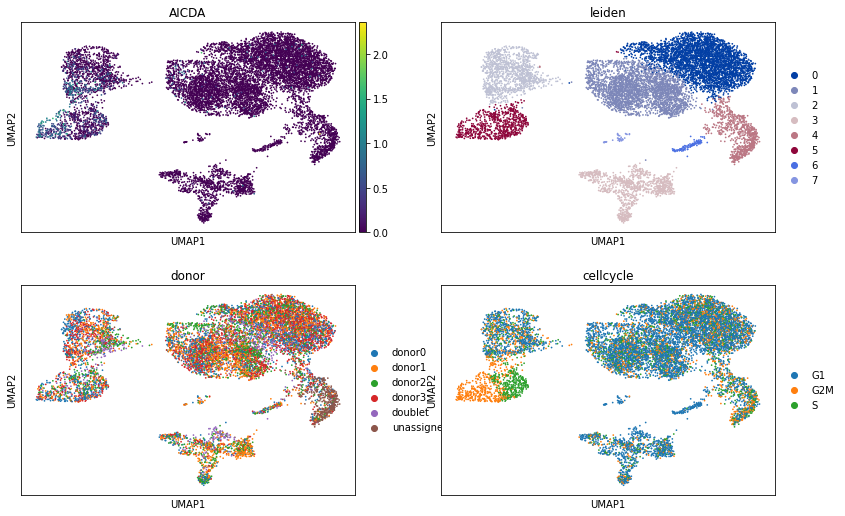

In [865]:
sc.pl.umap(bdata, color=['AICDA', 'leiden', 'donor', 'cellcycle'], ncols=2)

In [ ]:
bdata

In [797]:
tnbdata = ad.read('/corgi/filippe/allcells.h5ad')


In [974]:
tnbdata

AnnData object with n_obs × n_vars = 10034 × 7166
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype', 'leiden_joint', 'other_clusters', 'res1_clustering', 'res0.5_clustering', 'res0.7_clustering', 'celltypenew', 'restest'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batchname_colors', 'cellcycle_colors', 'celltype_colors', 'celltypenew_colors', 'dendrogram_celltype', 'dendrogram_leiden', 'dendrogram_res1_clustering', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'res0.5_clustering_colors', 'res0.7_clustering_colors', 'res1_clustering_colors', 'umap', 'restest_co

In [977]:
#tnbdata.to_df()

In [800]:
tnbcvar = ad.read('/corgi/filippe/allcellschromvar.h5ad')

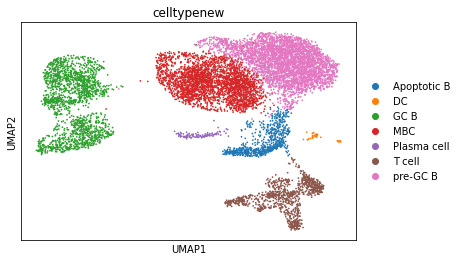

In [799]:
sc.pl.umap(tnbdata, 
           color=['celltypenew'], 
          # legend_loc="on data",
           save = 'primcells.png'
          )

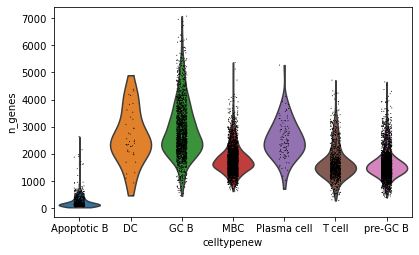

In [859]:
sc.pl.violin(tnbdata, 
           ['n_genes'], groupby = 'celltypenew', 
          # legend_loc="on data",
           save = 'theprimcells.png'
          )

In [860]:
tnbdata[tnbdata.obs['celltypenew'] == 'T cell']

View of AnnData object with n_obs × n_vars = 1013 × 7166
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype', 'leiden_joint', 'other_clusters', 'res1_clustering', 'res0.5_clustering', 'res0.7_clustering', 'celltypenew'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batchname_colors', 'cellcycle_colors', 'celltype_colors', 'celltypenew_colors', 'dendrogram_celltype', 'dendrogram_leiden', 'dendrogram_res1_clustering', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'res0.5_clustering_colors', 'res0.7_clustering_colors', 'res1_clustering_colors', 'umap'
    obsm: 'X_pca

In [861]:
tnbdata[tnbdata.obs['celltypenew'] == 'DC']

View of AnnData object with n_obs × n_vars = 41 × 7166
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype', 'leiden_joint', 'other_clusters', 'res1_clustering', 'res0.5_clustering', 'res0.7_clustering', 'celltypenew'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batchname_colors', 'cellcycle_colors', 'celltype_colors', 'celltypenew_colors', 'dendrogram_celltype', 'dendrogram_leiden', 'dendrogram_res1_clustering', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'res0.5_clustering_colors', 'res0.7_clustering_colors', 'res1_clustering_colors', 'umap'
    obsm: 'X_pca',

In [854]:
tnbdata

AnnData object with n_obs × n_vars = 10034 × 7166
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype', 'leiden_joint', 'other_clusters', 'res1_clustering', 'res0.5_clustering', 'res0.7_clustering', 'celltypenew'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batchname_colors', 'cellcycle_colors', 'celltype_colors', 'celltypenew_colors', 'dendrogram_celltype', 'dendrogram_leiden', 'dendrogram_res1_clustering', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'res0.5_clustering_colors', 'res0.7_clustering_colors', 'res1_clustering_colors', 'umap'
    obsm: 'X_pca', 'X_u

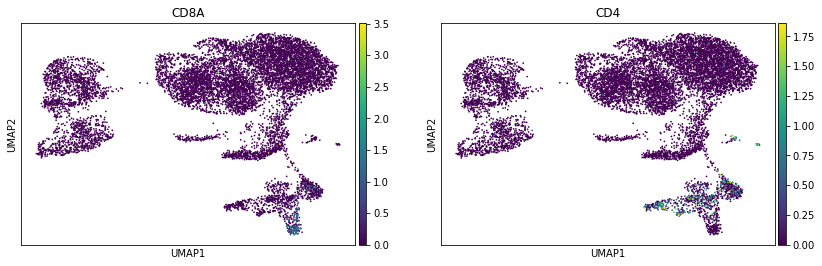

In [851]:
sc.pl.umap(tnbdata, 
           color=['CD8A', 'CD4', #'IL2RA'
                 ], 
          # legend_loc="on data",
          save = 'Tcells.png'
          )

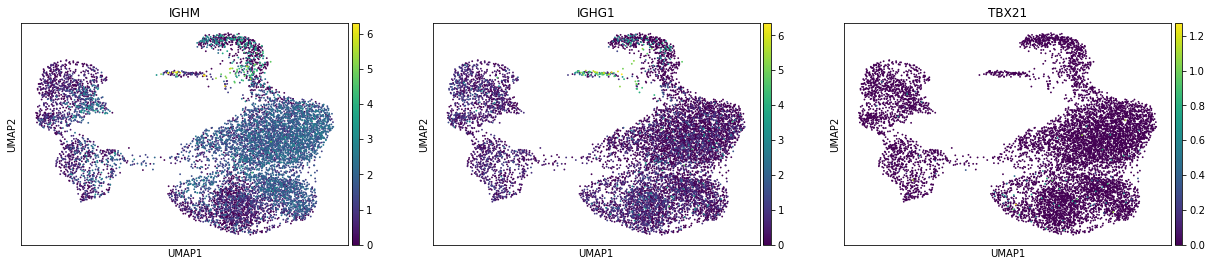

In [1090]:
sc.pl.umap(mdata['rna'], 
           color=['IGHM', 'IGHG1', 'TBX21' #'IL2RA'
                 ], 
          # legend_loc="on data",
         # save = 'Tcel2ls.png'
          )

In [1108]:
mdata['rna'].obs[mdata['rna'].obs['merged'] == 'IFN MBC']

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,batchname,S_score,G2M_score,phase,cellcycle,...,other_clusters,res1_clustering,res0.5_clustering,res0.7_clustering,bcellonlyres0.5,foratacres0.8,bcellonlyres0.7,newcelltypes,merged,restest
AAAGCTTGTTGCAGTA-4,1547,1547,3189.0,118.0,3.700219,4,0.004355,-0.039312,S,S,...,10,14,0,6,0,17,17,b sub,IFN MBC,17
ACACAATGTAGGTGTC-1,1164,1164,2001.0,115.0,5.747127,1,-0.000437,-0.033526,G1,G1,...,8,14,0,6,0,17,17,b sub,IFN MBC,17
ACACTAGGTTGTCATC-4,1426,1426,2574.0,85.0,3.302253,4,-0.055082,-0.010681,G1,G1,...,1,14,0,6,0,17,17,b sub,IFN MBC,17
ACCGGCTAGGTATTGC-4,1492,1492,2898.0,143.0,4.934438,4,-0.060409,0.010538,G2M,G2M,...,13,6,0,6,0,17,17,b sub,IFN MBC,17
ACCGGTTCAGCTTAGC-1,1394,1394,2641.0,177.0,6.702007,1,-0.010229,0.013652,G2M,G2M,...,1,14,0,6,0,17,17,b sub,IFN MBC,17
ACTAACCAGTAACTCA-1,1518,1518,3115.0,223.0,7.158908,1,-0.032646,-0.046953,G1,G1,...,1,14,0,6,0,17,17,b sub,IFN MBC,17
AGGTGAGGTTAACAGT-4,1336,1336,2521.0,150.0,5.950020,4,-0.058444,-0.024535,G1,G1,...,3,14,0,6,0,17,17,b sub,IFN MBC,17
AGTCGCATCACGAATC-1,1176,1175,2272.0,169.0,7.438380,1,0.000779,-0.046184,S,S,...,6,0,0,0,0,17,17,b sub,IFN MBC,2
AGTGTTTCACAACAGG-1,986,986,1607.0,43.0,2.675793,1,-0.029697,-0.029506,G1,G1,...,1,14,0,6,0,17,17,b sub,IFN MBC,17
ATCAAGACAAAGGCCA-3,1459,1459,2473.0,59.0,2.385766,3,0.011976,-0.049158,S,S,...,5,4,0,6,0,17,17,b sub,IFN MBC,17


In [1109]:
552 + 713 + 500 + 37

1802

In [1099]:
mdata['rna'].obs[mdata['rna'].obs['merged'] == 'LZ']

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,batchname,S_score,G2M_score,phase,cellcycle,...,other_clusters,res1_clustering,res0.5_clustering,res0.7_clustering,bcellonlyres0.5,foratacres0.8,bcellonlyres0.7,newcelltypes,merged,restest
AAACCAACATCCCTCA-2,2324,2323,5555.0,93.0,1.674167,2,-0.003089,-0.020617,G1,G1,...,4,3,3,3,3,1,1,DZ exit,LZ,1
AAACCGGCATTGTGGC-4,1880,1880,3760.0,119.0,3.164894,4,-0.048457,0.023563,G2M,G2M,...,12,3,3,3,3,1,1,DZ exit,LZ,1
AAACGCGCATAAAGCA-4,1667,1667,3202.0,39.0,1.217989,4,0.021403,-0.011111,S,S,...,4,3,3,3,3,1,1,DZ exit,LZ,1
AAAGCAAGTAACGAGG-1,3040,3040,7668.0,642.0,8.372458,1,-0.015104,0.019952,G2M,G2M,...,4,3,3,3,3,1,1,DZ exit,LZ,1
AAAGCAAGTCATTACC-1,2919,2918,7095.0,310.0,4.369274,1,-0.024897,-0.000157,G1,G1,...,4,3,3,3,3,1,1,DZ exit,LZ,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGACAACATAAG-3,2210,2210,4641.0,60.0,1.292825,3,0.001889,0.015033,G2M,G2M,...,4,3,3,3,3,1,1,DZ exit,LZ,1
TTTGCGACACCACAAC-2,3707,3707,9976.0,563.0,5.643544,2,-0.036228,0.003647,G2M,G2M,...,12,3,3,3,3,1,1,DZ exit,LZ,1
TTTGCGGAGATGCCTG-3,2069,2068,4842.0,98.0,2.023957,3,-0.048818,0.015668,G2M,G2M,...,12,3,3,3,3,1,1,DZ exit,LZ,1
TTTGGCTGTCAATGTG-3,2180,2180,4611.0,111.0,2.407287,3,-0.060748,-0.029287,G1,G1,...,4,3,3,3,3,1,1,DZ exit,LZ,1


In [1100]:
268 + 404 + 286 + 823

1781

In [ ]:
sc.pl.umap(tnbdata, 
           color=['CD8A', 'CD4', #'IL2RA'
                 ], 
          # legend_loc="on data",
          save = 'Tcells.png'
          )

In [842]:
findtf('MAF')

,Chromosome,Start,End,Name
3829,chr11,71962276,71963154,MAF::NFE2_MA0501.1
4555,chr12,14601813,14602733,MAF::NFE2_MA0501.1
4903,chr12,34033678,34034587,MAF::NFE2_MA0501.1
5973,chr13,22162985,22163674,MAFF_MA0495.3
5974,chr13,22162985,22163674,MAFG_MA0659.2
...,...,...,...,...
574892,chr7,7566485,7567363,MAFF_MA0495.3
575197,chr7,50782141,50782996,MAFF_MA0495.3
575273,chr7,73667345,73668234,MAFF_MA0495.3
576954,chr8,130443067,130443925,MAF_MA1520.1


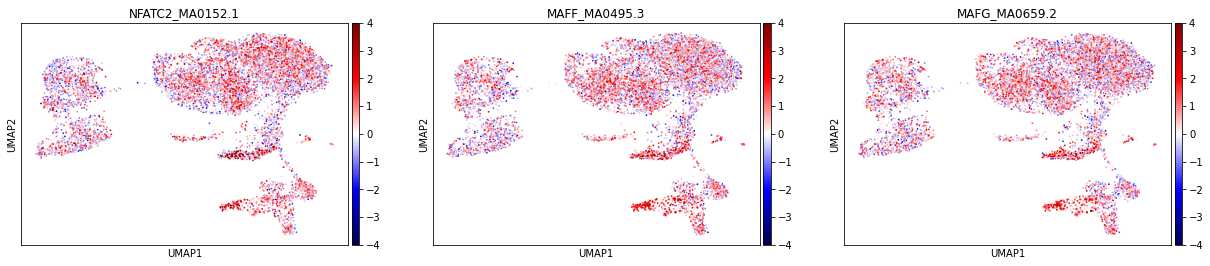

In [853]:
sc.pl.umap(tnbcvar, 
           color=['NFATC2_MA0152.1', 'MAFF_MA0495.3', 'MAFG_MA0659.2'], 
          # legend_loc="on data",
           save = 'cvarTcells.png', 
           cmap='seismic', vmin=-4, vmax=4
          )

In [10]:
mdata = mu.read('/corgi/filippe/FromHome/mostrecentbcellsclust.h5mu')

In [11]:
mdata

MuData object with n_obs × n_vars = 10034 × 122758
  obs:	'leiden_joint', 'few_clusters', 'other_clusters'
  var:	'dispersions', 'dispersions_norm', 'feature_types', 'gene_ids', 'genome', 'highly_variable', 'highly_variable_intersection', 'highly_variable_nbatches', 'interval', 'mean', 'mean_counts', 'means', 'n_cells', 'n_cells_by_counts', 'pct_dropout_by_counts', 'std', 'total_counts'
  obsm:	'X_mofa', 'X_umap'
  varm:	'LFs'
  obsp:	'connectivities', 'distances'
  2 modalities
    atac:	10034 x 115592
      obs:	'n_genes_by_counts', 'total_counts', 'n_genes', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'batchname', 'leiden', 'rna_celltype', 'leiden_joint', 'other_clusters', 'foratacres0.8'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'atac', 'batchname_colors', 'dendrogram_leiden', 'dendrogram_rna_celltype', 'files', 'foratacres0.8_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'rna_celltype_colors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    rna:	8980 x 7166
      obs:	'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype', 'leiden_joint', 'other_clusters', 'res1_clustering', 'res0.5_clustering', 'res0.7_clustering', 'bcellonlyres0.5', 'foratacres0.8', 'bcellonlyres0.7', 'newcelltypes', 'merged'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'batchname_colors', 'bcellonlyres0.5_colors', 'bcellonlyres0.7_colors', 'cellcycle_colors', 'celltype_colors', 'dendrogram_bcellonlyres0.5', 'dendrogram_celltype', 'dendrogram_foratacres0.8', 'dendrogram_res1_clustering', 'foratacres0.8_colors', 'hvg', 'leiden', 'leiden_colors', 'merged_colors', 'neighbors', 'newcelltypes_colors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'res0.5_clustering_colors', 'res0.7_clustering_colors', 'res1_clustering_colors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'

In [41]:
#useful functions: 

atac = mdata['atac']

def gofr(chreg):
    df1 = atac.uns['atac']['peak_annotation'][atac.uns['atac']['peak_annotation']['peak'].str.contains(chreg)]
    return df1

def findgene(inchrlist):
    for i in inchrlist: 
        print(gofr(i))

def findcreg(geneid): 
    df1 = atac.uns['atac']['peak_annotation'][atac.uns['atac']['peak_annotation'].index.str.contains(geneid)]
    return df1 

In [42]:
# bed file containing tf binding sites on chromatin data: 
import pyranges as pr
dfr = pr.read_bed('/corgi/filippe/libsall/AGG1/outs/analysis/tf_analysis/peak_motif_mapping.bed', as_df=True)

# useful functions for tfs: 
def findtf(chreg):
    df1 = dfr[dfr['Name'].str.contains(chreg)]
    return df1

def tfget(tf): 
    tfa = dfr[dfr['Start'] == tf]
    return tfa
# example: 
# findtf('Arid3a_MA0151.1')



In [24]:
czdata = mu.read('/corgi/filippe/FromHome/czdata.h5mu')

/home/filippe/.local/lib/python3.8/site-packages/mudata/_core/mudata.py:376: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [40]:
czdata # only b cells

MuData object with n_obs × n_vars = 8980 × 8658
  3 modalities
    bonly:	8980 x 7166
      obs:	'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype', 'leiden_joint', 'other_clusters', 'res1_clustering', 'res0.5_clustering', 'res0.7_clustering', 'bcellonlyres0.5', 'foratacres0.8', 'bcellonlyres0.7', 'newcelltypes', 'merged'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'batchname_colors', 'bcellonlyres0.5_colors', 'bcellonlyres0.7_colors', 'cellcycle_colors', 'celltype_colors', 'dendrogram_bcellonlyres0.5', 'dendrogram_celltype', 'dendrogram_foratacres0.8', 'dendrogram_res1_clustering', 'foratacres0.8_colors', 'hvg', 'leiden', 'leiden_colors', 'merged_colors', 'neighbors', 'newcelltypes_colors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'res0.5_clustering_colors', 'res0.7_clustering_colors', 'res1_clustering_colors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'
    tfraw:	8980 x 746
      obs:	'batchname', 'n_genes_by_counts', 'total_counts', 'rna_celltype', 'leiden'
      var:	'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'bindingsite_counts'
      uns:	'dendrogram_rna_celltype', 'hvg', 'rank_genes_groups', 'rna_celltype_colors'
      obsm:	'X_pca', 'X_umap'
    zcvar:	8980 x 746
      obs:	'batchname', 'rna_celltype', 'leiden'
      var:	'gene_ids'
      uns:	'rna_celltype_colors'
      obsm:	'X_pca', 'X_umap'

In [ ]:
# all cells: 

chromvar = mu.read('/corgi/filippe/FromHome/atacrnatfanalysis/bcellcvar.h5mu')

In [25]:
dzdata = mu.read('/corgi/filippe/FromHome/dzdata.h5mu')
# dzdata.h5mu

In [26]:
lzdata = mu.read('/corgi/filippe/FromHome/lzdata.h5mu')

In [28]:
lzdata['lzmod']

AnnData object with n_obs × n_vars = 7205 × 7166
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype', 'leiden_joint', 'other_clusters', 'res1_clustering', 'res0.5_clustering', 'res0.7_clustering', 'bcellonlyres0.5'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batchname_colors', 'bcellonlyres0.5_colors', 'cellcycle_colors', 'celltype_colors', 'dendrogram_celltype', 'dendrogram_leiden', 'dendrogram_res1_clustering', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'res0.5_clustering_colors', 'res0.7_clustering_colors', 'res1_clustering_colors', 'umap'
    obsm: 'X_pca

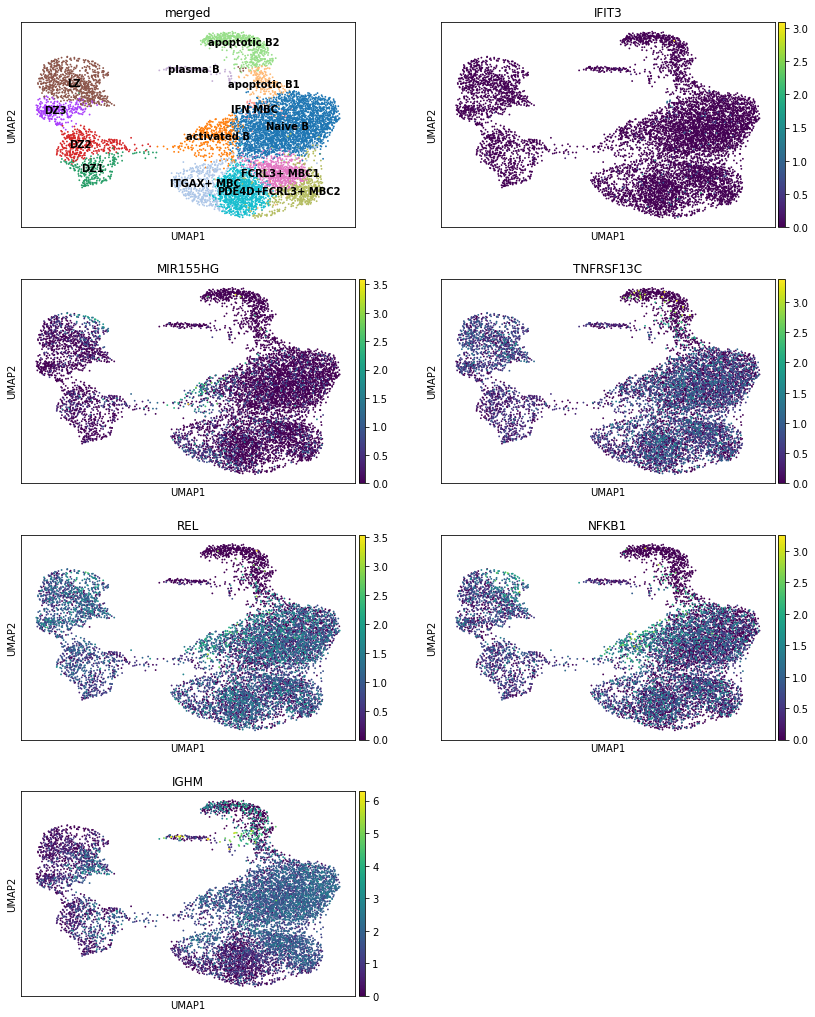

In [1054]:
sc.pl.umap(mdata['rna'],color=['merged', # 'CD69', 'IFI44L', 'STAT1', 'JUN', 'IRF7', 
                               'IFIT3', 'MIR155HG', 
                               'TNFRSF13C', # BAFFR gene -> very important in GC independent MBCs
                               'REL', 'NFKB1', 'IGHM'],ncols=2, legend_loc="on data")

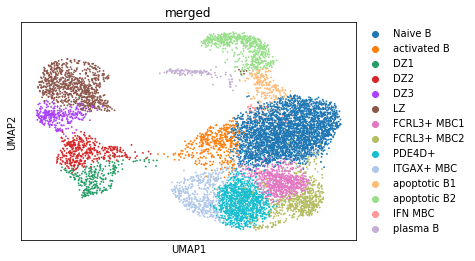

In [1051]:
sc.pl.umap(mdata['rna'],color=['merged'],ncols=2, save='nITGAXd.png')

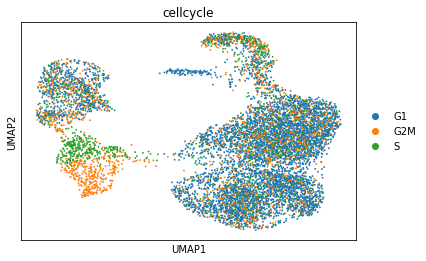

In [868]:
sc.pl.umap(mdata['rna'],color=['cellcycle'],ncols=2, save='celcycle.png')

In [1052]:
#mdata['rna']
mdata['rna'].write('/corgi/filippe/mergedITGAXclust.h5ad')

In [1030]:
#sc.tl.leiden(bdata, resolution = 0.2, key_added= 'restest')

#sc.pl.umap(bdata, color=['restest'],ncols=2)

In [1034]:
#tnbdata

#sc.tl.leiden(tnbdata, resolution = 0.3, key_added= 'restest')

#sc.pl.umap(tnbdata, color=['leiden', 'restest'], ncols=2)

#adata.obs.louvain.rename(columns={'1': 'SampleA', '2': 'SampleB', '3': 'SampleC' ......})

#sc.pl.umap(mdata['rna'], color=['newcelltypes', 'merged'],ncols=1)

In [1035]:
#tnbdata
#mdata['rna'].write('/corgi/filippe/processedRNA.h5ad')

In [946]:
#mdata['rna'].obs['merged']

In [ ]:
# how to rename: 
# adata.obs.louvain.rename(columns={'1': 'SampleA', '2': 'SampleB', '3': 'SampleC' ......})

In [831]:
#sc.pl.umap(mdata['rna'],color=['merged', 'IFIT3',
#                               'MIR155HG', 'FUT8', 'REL', 'NFKB1', 'TNFAIP3', 'PTPN6',
#                               'CD80', 'CD44', 'GPR183', 'RELB', 'ZEB2', 'FOXO1', 'FCER2'
#                              ],ncols=2, legend_loc="on data")

In [947]:
# examining light zone markers
# 2nd dark zone: Cyclin B1+GL7+CXCR4+CD83+ B cells 

#sc.pl.umap(mdata['rna'],color=['merged', 'IGHD', 'FCER2', #cd23
#                               'CD83', 'CXCR4', 'CD86',
#                               'CCR6', # memory
#                               'EGR2', 'EGR3', 'PRDM1', 
#                              # 'GL7',
#                               'CCNB1', 'CD9', 'ID3', 'PTEN'
#                              ],ncols=2, legend_loc="on data")
#mdata['rna']

In [978]:
#sc.pl.violin(mdata['rna'], ['n_genes'], groupby= 'merged', rotation=90)

In [1036]:
# plasma cell markers: 
#sc.pl.umap(mdata['rna'],color=['merged', 'cellcycle', 'PRDM1', 'BTNL9', 
#                               'XBP1', 'JCHAIN', 'PAX5', 'CD80', 'MZB1', 'BCL6', 'MME'
 #                             ],ncols=2, legend_loc="on data")

In [949]:
#sc.pl.umap(mdata['rna'],color=['merged', 'MALAT1', 'PDE4D', 'B2M', 'MT-ND3', 'ZDHHC14', 'BCL2A1', 'BATF'
     #                         ],ncols=2, legend_loc="on data")

In [131]:
sc.tl.rank_genes_groups(mdata['rna'], 'merged')

In [780]:
pd.DataFrame(mdata['rna'].uns['rank_genes_groups']['names']).head(15)

,DZ1,DZ2,DZ3,DZ exit,DZ reentry1,DZ reentry2,IgM-,Naive B,SOX5+,activated B,apoptotic B1,apoptotic B2,b sub,plasma B
0,HMGB2,HMGB1,BACH2,AC023590.1,MALAT1,BANK1,MALAT1,COL19A1,BANK1,HSP90AB1,ARHGEF18,IGKC,IFI44L,SSR4
1,HMGB1,GAPDH,SYNE2,LRMP,BANK1,ARHGAP15,PDE4D,FOXP1,SOX5,CD83,MT-ND3,RPS29,PARP14,MZB1
2,TUBA1B,HMGN2,EZR,RABGAP1L,B2M,MALAT1,BANK1,IGHD,ZEB2,DDX21,BANK1,IGLC2,XAF1,XBP1
3,TOP2A,DNMT1,LPP,TOX,ARHGAP24,ARHGAP24,B2M,BANK1,FCRL5,SLC38A1,MT-ATP6,RPL39,EPSTI1,FNDC3B
4,HMGN2,HELLS,USP34,MYO1E,ARHGAP15,RALGPS2,MT-ND3,AFF3,PTPN1,NFKB1,STEAP1B,RPS27,CCSER1,PRDM1
5,SMC4,STMN1,SEL1L3,RFTN1,RPL13A,BCL2,ZDHHC14,ARHGAP15,MEF2A,CCND2,IGKC,IGHGP,FCHSD2,HSP90B1
6,STMN1,PFN1,RAPGEF5,LPP,CCSER1,PRKCB,RPS14,FCRL1,RABGAP1L,HIVEP3,IGHV6-1,IGLC1,RNF213,TXNDC5
7,MKI67,DEK,RFTN1,KLHL6,RPL34,TCF4,RPL34,VAV3,ZDHHC21,NCL,LAMC1,IGHA1,EIF4G3,FKBP11
8,NUSAP1,HMGB2,EHMT1,PAG1,HLA-B,DOCK10,ANK3,ADK,FUT8,PTMA,DISC1,IGLC3,SP100,DERL3
9,NUCKS1,H2AFZ,AFF3,RAPGEF5,RPL41,FUT8,AL355076.2,KHDRBS2,RIPOR2,CMSS1,IQCJ-SCHIP1,HIST1H4C,MX1,SEC11C


In [1046]:
#markers = ['IGHD', 'CD19', 'CD69', 'CD83', 'IER2', 'DUSP2', 'JUN', 'EGR1', 'PARVB', 'PSME2', 'CCND2']
#markers= {"activated": ['CD69', 'CD83', 'IER2', 'DUSP2', 'JUN', 'EGR1', 'IRF4'], 
#          "Memory B cell": ['CCR6', 'CELF2', 'RASGRP2'], 
#          "naive": ['IGHD', 'IGHM', 'CD19', 'TXNIP', 'FCER2', 'FCMR', 'SELL', 'BANK1'], 
#          "plasma": ['XBP1', 'JCHAIN', 'SLAMF7', 'PRDM1'], 
#          "B sub": ['IFI44L', 'STAT1', 'JUN', 'IRF7', 'IFIT3', 'ISG15', 'MX1'], 
#          "DZ": ['AICDA', 'MKI67', 'STMN1', 'PCLAF', 'CD72'], 
#          "DZ exit": ['LMO2', 'CAMK1', 'CD22'],
#          "DZ reentry": ['CD27', 'CFLAR', 'FOXP1', 'PTPN6'], 
#          "LZ": ['IGHA1', 'IGHG1'], }

#sc.pl.dotplot(mdata['rna'], markers, groupby='merged', swap_axes=True)

# works!
#mdata['rna'].obs.merged.cat.rename_categories({'DZ exit': 'LZ', 
#                                        #'2': 'SampleB', 
#                                       }, inplace= True)


#mdata['rna'].obs.merged.cat.rename_categories({'DZ reentry1': 'FCRL3+ MBC1', 
#                                               'DZ reentry2': 'FCRL3+ MBC2', 
#                                        #'2': 'SampleB', 
                  #                            }, inplace= True)

#mdata['rna'].obs.merged.cat.rename_categories({'DZ exit': 'LZ', 
#                                        #'2': 'SampleB', 
#                                       }, inplace= True)

# CD11C+   



#mdata['rna'].obs.merged.cat.rename_categories({'SOX5+': 'CD11C+ MBC', 
#                                        #'2': 'SampleB', 
#                                              }, inplace= True)

#mdata['rna'].obs.merged.cat.rename_categories({'IgM-': 'PDE4D+', 
                                       #'2': 'SampleB', 
#                                              }, inplace= True)


#mdata['rna'].obs.merged.cat.rename_categories({'b sub': 'IFN MBC', 
#                                       #'2': 'SampleB', 
 #                                             }, inplace= True)

mdata['rna'].obs.merged.cat.rename_categories({'CD11C+ MBC': 'ITGAX+ MBC', 
#                                       #'2': 'SampleB', 
                                              }, inplace= True)    
    

In [753]:
#mdata['rna'].obs.head(40)

In [948]:
# sc.pl.heatmap(mdata['rna'], markers, groupby='merged', save='firstfig.png')
# save figure with save arg!

#markers= {"activated": ['CD69', 'CD83', 'IER2', 'DUSP2', 'JUN', 'EGR1', 'IRF4'], 
 #         "Memory B cell": ['CCR6', 'CELF2', 'RASGRP2'], 
#          "naive": ['IGHD', 'IGHM', 'CD19', 'TXNIP', 'FCER2', 'FCMR', 'SELL', 'BANK1'], 
#          "plasma": ['XBP1', 'JCHAIN', 'SLAMF7', 'PRDM1'], 
  #        "B sub": ['IFI44L', 'STAT1', 'JUN', 'IRF7', 'IFIT3', 'ISG15', 'MX1'], 
  #        "DZ": ['AICDA', 'MKI67', 'STMN1', 'PCLAF', 'CD72'], 
 #         "DZ exit": ['LMO2', 'CAMK1', 'CD22'],
  #        "DZ reentry": ['CD27', 'CFLAR', 'FOXP1', 'PTPN6'], 
  #        "LZ": ['IGHA1', 'IGHG1'], }

#sc.pl.heatmap(mdata['rna'], markers, groupby='merged')

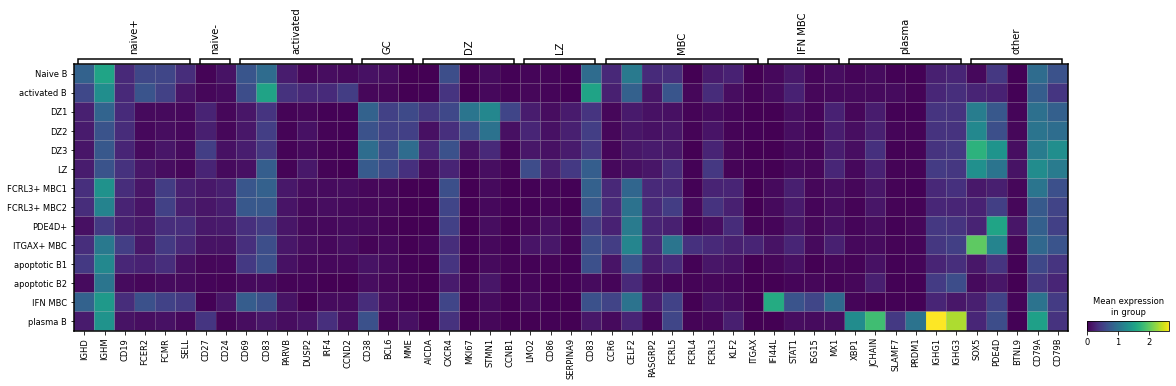

In [1047]:
markers= {
          "naive+": ['IGHD', 'IGHM', 'CD19', 'FCER2', 'FCMR', 'SELL'],
          "naive-": ['CD27', #'CD38', 
                     'CD24'],
          "activated": ['CD69', 'CD83', 
                        'PARVB', 'DUSP2', 'IRF4', 'CCND2'], 
          "GC": ['CD38', 'BCL6', 'MME'], 
    
          "DZ": ['AICDA', 'CXCR4','MKI67', 'STMN1', 'CCNB1' #'PCLAF', #'CD72'
                ], 
          "LZ": ['LMO2', 'CD86', #'CAMK1', # 'CD22', 
                 'SERPINA9', 'CD83'],
         # "DZ reentry": ['CD27', 'CFLAR', 'FOXP1', 'PTPN6', 'BLK', 'FCRL2'], 
          
          
         # "IgM-": ['SOX5', 'ZEB2'],
          "MBC": ['CCR6', 'CELF2', 'RASGRP2', 'FCRL5', 'FCRL4', 'FCRL3',
                           'KLF2', 'ITGAX' # 'VIM', #'MME' #'CD10'#'CD27' # 'BANK1'
                          ],  
          
          "IFN MBC": ['IFI44L', 'STAT1', #'IRF7',
                     # 'IFIT3',
                      'ISG15', 'MX1'], 
          "plasma": ['XBP1', 'JCHAIN', 'SLAMF7', 'PRDM1', 'IGHG1', 'IGHG3'], 
          "other": ['SOX5', 'PDE4D', 'BTNL9', 'CD79A', 'CD79B'], 
    
        # "LZ": ['IGHA1', 'IGHG1', 'IGHG3', 'SOX5', 'GMDS', 'CD86', 'CD80', 'CD40', 'BCL2A1', 'CD44', 'GPR183'],
        # "Memory B cell": ['CCR6', 'CELF2', 'RASGRP2'], 
              } 


sc.pl.matrixplot(mdata['rna'], markers, groupby='merged', save='firstITGAX2fig.png'
                )

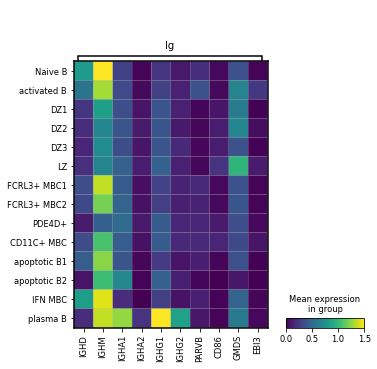

In [972]:
markers= {
          "Ig": ['IGHD', 'IGHM', 'IGHA1', 'IGHA2', 
                 'IGHG1', 'IGHG2', 'PARVB', 'CD86', 'GMDS', 'EBI3'],
         # "naive+": ['IGHD', 'IGHM', 'CD19', 'FCER2', 'FCMR', 'SELL'],
        #  "naive-": ['CD27', 'CD38', 'CD24'],
          
        # "Memory B cell": ['CCR6', 'CELF2', 'RASGRP2'], 
              } 


sc.pl.matrixplot(mdata['rna'], markers, groupby='merged', vmax=1.5, #save='secondfig.png'
                )

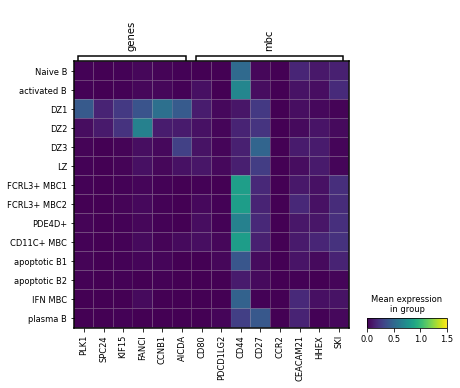

In [1043]:
markers= {
          "genes": ['PLK1', 'SPC24', 'KIF15', 'FANCI', 'CCNB1', 'AICDA'],
          "mbc": ['CD80', 
                  'PDCD1LG2',
                  #'PDL2',
                  'CD44', 
                  #'CD73'
                  'CD27', 
                  #'CD21', 
                  'CCR2', 'CEACAM21', 'HHEX', 'SKI', # 'MAFF', 'MAFG'
                #  'CD62L'
                 ],
         # "naive+": ['IGHD', 'IGHM', 'CD19', 'FCER2', 'FCMR', 'SELL'],
        #  "naive-": ['CD27', 'CD38', 'CD24'],
          
        # "Memory B cell": ['CCR6', 'CELF2', 'RASGRP2'], 
              } 


sc.pl.matrixplot(mdata['rna'], markers, groupby='merged', vmax=1.5, #save='secondfig.png'
                )

In [733]:
0.05/150

0.0003333333333333334

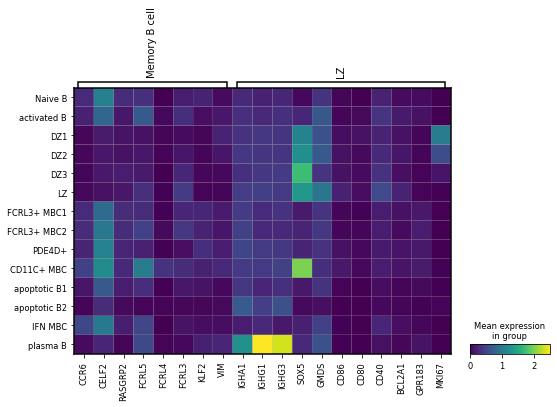

In [877]:
llist= list(pd.DataFrame(mdata['rna'].uns['rank_genes_groups']['names']).head(25)['IgM-']) 

markers= {
          #"FO": ['FOXO1', 'BATF', 'TBX21', 'BTNL9', 'CXCR4', 'CD83', #'RASSF6'
            #    ],
         # "naive+": ['IGHD', 'IGHM', 'CD19', 'FCER2', 'FCMR', 'SELL'],
        #  "naive-": ['CD27', 'CD38', 'CD24'],
          
         "Memory B cell": ['CCR6', 'CELF2', 'RASGRP2', 'FCRL5', 'FCRL4', 'FCRL3',
                           'KLF2', 'VIM', #'MME' #'CD10'#'CD27' # 'BANK1'
                          ], 
      #   "other": llist, 
         "LZ": ['IGHA1', 'IGHG1', 'IGHG3', 'SOX5', 'GMDS', 
                'CD86', 'CD80', 'CD40', 'BCL2A1', 'GPR183', 'MKI67']   
              } 


sc.pl.matrixplot(mdata['rna'], markers, groupby='merged', vmax = 2.5)

In [1037]:
#sc.pl.umap(mdata['rna'], color= ['merged', 'cellcycle', 'FCRL5', 'JCHAIN', 'IGHM', 'SOX5', 'BCL6'], ncols=2 #legend_loc="on data", 
           #save= 'mergedcell.png'
#          )

In [1038]:
# mdata['rna'].obs.celltype

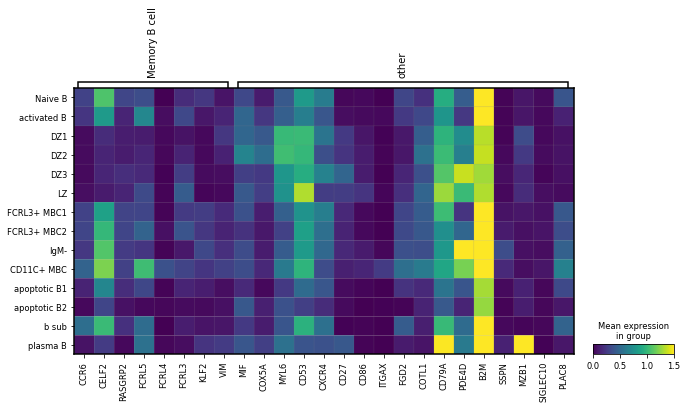

In [787]:
#llist= list(pd.DataFrame(mdata['rna'].uns['rank_genes_groups']['names']).head(15)['IgM-']) 

markers= {
          #"FO": ['FOXO1', 'BATF', 'TBX21', 'BTNL9', 'CXCR4', 'CD83', #'RASSF6'
            #    ],
         # "naive+": ['IGHD', 'IGHM', 'CD19', 'FCER2', 'FCMR', 'SELL'],
        #  "naive-": ['CD27', 'CD38', 'CD24'],
          
         "Memory B cell": ['CCR6', 'CELF2', 'RASGRP2', 'FCRL5', 'FCRL4', 'FCRL3',
                           'KLF2', 'VIM', #'MME' #'CD10'#'CD27' # 'BANK1'
                          ], 
         "other": ['MIF', 'COX5A', 'MYL6', 'CD53', 'CXCR4', 
                   'CD27', 'CD86', 'ITGAX', 'FGD2', 'COTL1', 'CD79A', 'PDE4D', 
                   'B2M', 'SSPN', 'MZB1', 'SIGLEC10', 'PLAC8' # 'IRF5' #'CD20'
                          ], 
         
              } 


sc.pl.matrixplot(mdata['rna'], markers, groupby='merged', vmax = 1.5)

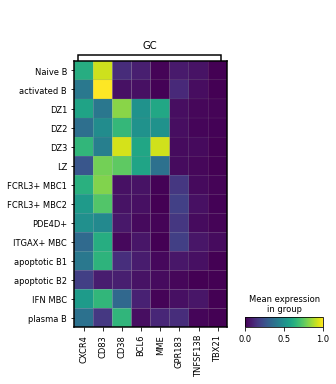

In [1068]:
#sc.pl.dotplot(mdata['rna'], markers, groupby='merged', swap_axes=True)
markers= {
          "GC": [ 'CXCR4', 'CD83', 'CD38', 'BCL6', 'MME', # MME is CD10
                 'GPR183', 'TNFSF13B', # BAFF 
                 'TBX21'
                 #'RASSF6'
                ],
         # "naive+": ['IGHD', 'IGHM', 'CD19', 'FCER2', 'FCMR', 'SELL'],
        # "naive-": [''],
    
        #  "naive-": ['CD27', 'CD38', 'CD24'],
         
              } 


sc.pl.matrixplot(mdata['rna'], markers, groupby='merged', vmax = 1.0)

/home/mahogny/miniconda3_38/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _ = ax.pcolor(_color_df, **kwds)


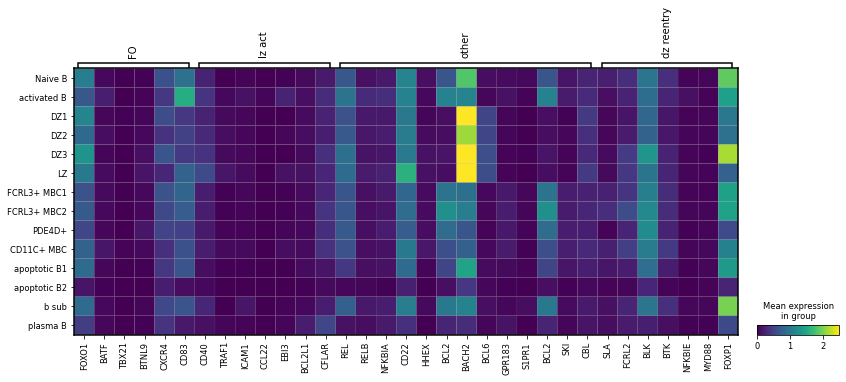

In [811]:
markers= {
          "FO": ['FOXO1', 'BATF', 'TBX21', 'BTNL9', 'CXCR4', 'CD83', #'RASSF6'
                ],
         # "naive+": ['IGHD', 'IGHM', 'CD19', 'FCER2', 'FCMR', 'SELL'],
        #  "naive-": ['CD27', 'CD38', 'CD24'],
          
         "lz act": ['CD40', 'TRAF1', 'ICAM1', 'CCL22', 'EBI3', 'BCL2L1', 'CFLAR'], 
         "other": ['REL', 'RELB', 'NFKBIA', 'CD22', 
                   'HHEX', 'BCL2', 'BACH2', 'BCL6', 'GPR183', 'S1PR1', 'BCL2', 'SKI', 'CBL'],
         "dz reentry": ['SLA', 'FCRL2', 'BLK', 'BTK', 'NFKBIE', 'MYD88', 'FOXP1'],
              } 


sc.pl.matrixplot(mdata['rna'], markers, groupby='merged', vmax = 2.5)

In [ ]:
# 'RUNX3_MA0684.2', 'ZBTB7B_MA0694.1', 'NFIX(var.2)_MA1528.1',
#          'IRF8_MA0652.1', 'BATF3_MA0835.2', 'SOX4_MA0867.2', 'IRF7_MA0772.1'

In [1077]:
#mdata
findtf('STAT')

,Chromosome,Start,End,Name
414,chr1,78649346,78650235,STAT1::STAT2_MA0517.1
2463,chr10,11604631,11605490,STAT1::STAT2_MA0517.1
2929,chr10,73158852,73159731,STAT3_MA0144.2
3041,chr10,79910131,79910960,STAT1::STAT2_MA0517.1
3128,chr10,89945856,89946680,STAT1::STAT2_MA0517.1
...,...,...,...,...
578867,chrY,7273423,7274270,STAT1::STAT2_MA0517.1
578876,chrY,11322401,11323027,STAT1_MA0137.3
578877,chrY,11322401,11323027,STAT3_MA0144.2
578880,chrY,11332883,11333547,STAT1_MA0137.3


In [ ]:
sc.pl.umap(mdata['rna'],color=['merged', 'CD69', 'CD83', 'IER2', 'DUSP2', 'JUN', 'EGR1'
                              ],ncols=2, legend_loc="on data")

In [1039]:
#sc.pl.violin(mdata['rna'], ['pct_counts_mt'], groupby='merged', rotation=90)

# pre PB cell markers: 
# sc.pl.umap(mdata['rna'],color=['merged', 'HOPX', 'BTNL9', 'FRZB', 'FGFR1'     
#                              ],ncols=2, legend_loc="on data")



In [670]:
mdata['rna'].write('/corgi/filippe/FromHome/atacrnatfanalysis/bcellsonlyrna.h5ad')

In [673]:
czdata['zcvar'].write('/corgi/filippe/FromHome/atacrnatfanalysis/bcellsonlyTFs.h5ad')

In [1040]:
# pre GC or activated b cell markers: 
#sc.pl.umap(mdata['rna'],color=['merged', 'CD69', 'CD83', 'IER2', 'DUSP2', 'JUN', 'EGR1', # activated b
  #                             'PARVB', 'PSME2', 'CCND2', 'CCNA2', 'HOPX',      # pre GC B
  #                             'BCL6', 'CXCR4', 'CD83', 'CBL'
 #                             ],ncols=2, legend_loc="on data")

# activated B also shows markers for preGC b cells, hence early activated b cells!

In [593]:
# naive b cells: 
#sc.pl.umap(mdata['rna'],color=['merged', 'IGHD', 'TXNIP', 'FCER2', 'FCMR', 'SELL', 'BANK1', 'BATF', 'BCL2A1', 'AL627309.1'
#                              ],ncols=2, legend_loc="on data")

In [592]:
# IFN gamma memory b cells

#sc.pl.umap(lzdata['lzmod'],color=['leiden', 'CD69', 'IFI44L', 'STAT1', 'JUN', 'IRF7', 
  #                             'IFIT3', 'ISG15', 'MX1', 'CIITA', 'IGHD', 'IGHM', 'IGHA1', 'FOXO1'],ncols=2)

In [655]:
#findcreg('FOXO1')

In [672]:
czdata['zcvar']

AnnData object with n_obs × n_vars = 8980 × 746
    obs: 'batchname', 'rna_celltype', 'leiden', 'merged'
    var: 'gene_ids'
    uns: 'rna_celltype_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'

In [1086]:
findtf('SMRT')

,Chromosome,Start,End,Name


In [1041]:
#sc.pl.umap(czdata['zcvar'], color=['Sox5_MA0087.1', 'TCF3_MA0522.3', 'TCF4_MA0830.2', 
#                                   'NFKB1_MA0105.4', 'NFKB2_MA0778.1', 
 #                                  'Stat4_MA0518.1', 'Stat6_MA0520.1', 'Stat5b_MA1625.1',
#                                   'NFATC2_MA0152.1', 'NFATC1_MA0624.1', 'Foxo1_MA0480.1'], cmap='seismic', 
 #          vmin=-3, vmax=3, ncols=2)

In [1049]:
# sc.pl.matrixplot(czdata['zcvar'], color=['Sox5_MA0087.1'], groupby='merged', cmap='seismic')


czdata['zcvar'].obs['merged'] = mdata['rna'].obs['merged']

#findtf('NFATC2')

/home/mahogny/miniconda3_38/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _ = ax.pcolor(_color_df, **kwds)


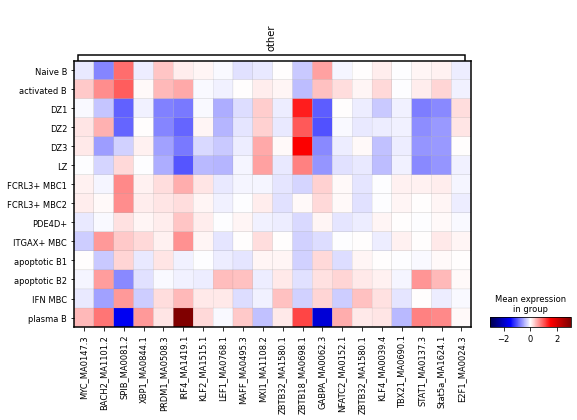

In [1085]:
marks= {
          
          "other": ['MYC_MA0147.3', 'BACH2_MA1101.2', 
                    'SPIB_MA0081.2', 'XBP1_MA0844.1', 
                    'PRDM1_MA0508.3', 'IRF4_MA1419.1', 
                    'KLF2_MA1515.1', 'LEF1_MA0768.1', 
                    'MAFF_MA0495.3', 'MXI1_MA1108.2', 
                    'ZBTB32_MA1580.1', 'ZBTB18_MA0698.1', 
                    'GABPA_MA0062.3', 'NFATC2_MA0152.1', 
                    'ZBTB32_MA1580.1', 'KLF4_MA0039.4', 
                    'TBX21_MA0690.1', 'STAT1_MA0137.3', 
                    'Stat5a_MA1624.1', 'E2F1_MA0024.3'],
        # "Memory B cell": ['CCR6', 'CELF2', 'RASGRP2'], 
              } 


sc.pl.matrixplot(czdata['zcvar'], marks, groupby='merged', cmap='seismic', vmin=-3, vmax=3, 
                # save = 'tfs.png'
                )



/home/mahogny/miniconda3_38/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _ = ax.pcolor(_color_df, **kwds)


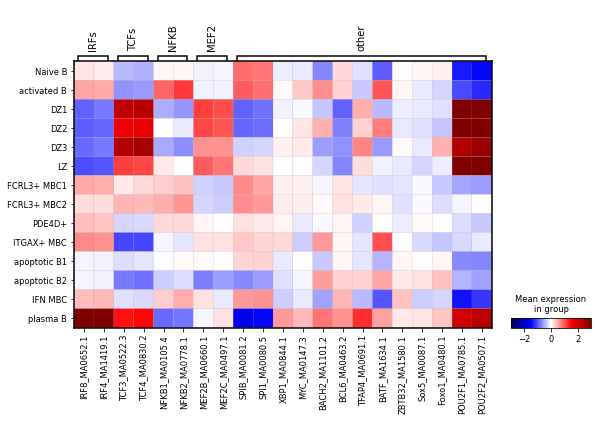

In [1087]:
marks= {
          "IRFs": ['IRF8_MA0652.1', 'IRF4_MA1419.1'],
          "TCFs": ['TCF3_MA0522.3', 'TCF4_MA0830.2'],
          "NFKB": ['NFKB1_MA0105.4', 'NFKB2_MA0778.1'],
          "MEF2": ['MEF2B_MA0660.1', 'MEF2C_MA0497.1'],
        #  "plasma": ['SPIB_MA0081.2', 'SPI1_MA0080.5'],
          "other": [
                    'SPIB_MA0081.2', 'SPI1_MA0080.5', 
                    'XBP1_MA0844.1',
                    'MYC_MA0147.3', 'BACH2_MA1101.2', 
                    'BCL6_MA0463.2', 'TFAP4_MA0691.1', 
                    'BATF_MA1634.1', 'ZBTB32_MA1580.1',
                    #'EBF1_MA0154.4',  
                    # 'E2F1_MA0024.3',
                    'Sox5_MA0087.1', 'Foxo1_MA0480.1', 
                    'POU2F1_MA0785.1', 'POU2F2_MA0507.1'],
        # "Memory B cell": ['CCR6', 'CELF2', 'RASGRP2'], 
              } 


sc.pl.matrixplot(czdata['zcvar'], marks, groupby='merged', cmap='seismic', vmin=-3, vmax=3, 
                save = 'tf2ITGAXs.png'
                )

# FOXO1 is suppressed by PI3K signalling

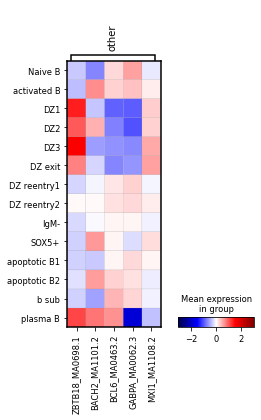

In [823]:
marks= {
        #  "IRFs": ['IRF8_MA0652.1', 'IRF4_MA1419.1'],
        #  "TCFs": ['TCF3_MA0522.3', 'TCF4_MA0830.2'],
       #   "NFKB": ['NFKB1_MA0105.4', 'NFKB2_MA0778.1'],
      #    "MEF2": ['MEF2B_MA0660.1', 'MEF2C_MA0497.1'],
          "other": ['ZBTB18_MA0698.1', 'BACH2_MA1101.2', 'BCL6_MA0463.2',
                    'GABPA_MA0062.3', 'MXI1_MA1108.2'],
        # "Memory B cell": ['CCR6', 'CELF2', 'RASGRP2'], 
              } 


sc.pl.matrixplot(czdata['zcvar'], marks, groupby='merged', cmap='seismic', vmin=-3, vmax=3)



In [188]:
#sc.pl.matrixplot(czdata['zcvar'], marks, groupby='merged', cmap='seismic', vmin=-3, vmax=3)

In [207]:
mdata['rna'].obs.merged.cat.reorder_categories([
    'Naive B', 'activated B', 'DZ1', 'DZ2', 'DZ3', 'DZ exit', 'DZ reentry1', 
    'DZ reentry2', 'IgM-', 'SOX5+', 'apoptotic B1', 'apoptotic B2', 'b sub', 'plasma B'], inplace=True)



In [185]:
czdata['zcvar'].obs.merged.cat.reorder_categories([
    'Naive B', 'activated B', 'DZ1', 'DZ2', 'DZ3', 'DZ exit', 'DZ reentry1', 
    'DZ reentry2', 'IgM-', 'SOX5+', 'apoptotic B1', 'apoptotic B2', 'b sub', 'plasma B'], inplace=True)


 #'Naive B': ['8','3','2','5','15'], 'activated B': ['10'], 
#             'apoptotic B1': ['14'], 'apoptotic B2': ['6'], 'SOX5+': ['9'],
#             'DZ reentry1': ['4'], 'DZ reentry2': ['7'], 'DZ exit': ['1'], 
#             'b sub': ['17'], 'plasma B': ['16'], 'IgM-': ['0'], 
#             'DZ1': ['13'], 'DZ2': ['11'], 'DZ3': ['12']}

In [183]:
print(3)

3


In [115]:
czdata['zcvar'].obs['merged']= mdata['rna'].obs['merged']

In [221]:
czdata['zcvar']

AnnData object with n_obs × n_vars = 8980 × 746
    obs: 'batchname', 'rna_celltype', 'leiden', 'merged'
    var: 'gene_ids'
    uns: 'rna_celltype_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'

In [652]:
#mdata['rna'].var

In [608]:
#mdata['rna'].var.index.str.contains()

In [607]:
#findtf('IRF8')

In [989]:
bdata

AnnData object with n_obs × n_vars = 10168 × 7378
    obs: 'batchname', 'cellbc', 'donor', 'prob_doublet', 'trust4_celltype', 'batch', 'cnt_telo', 'cnt_atac', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'log_telo', 'log_telo_norm', 'log_total_counts', 'restest'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batchname_colors', 'cellcycle_colors', 'dendrogram_leiden', 'donor_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'trust4_celltype_colors', 'umap', 'restest_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [999]:
#old_to_new = dict(
#    '0'='pre-GC B',
#    '1'='MBC',
#    '2'='GC B',
#    '5'='GC B', 
#    '3'='T cell',
#    '4'='Apoptotic B',
#    '6'='Plasma cell', 
#    '7'='DC'
# )
bdata.obs['newest_clusters'] = (
    bdata.obs['restest']
    .map(old_to_new)
    .astype('category')
)

In [998]:
old_to_new = dict({
    '0': 'pre-GC B',
    '1': 'MBC',
    '2': 'GC B',
    '5': 'GC B', 
    '3': 'T cell',
    '4': 'Apoptotic B',
    '6': 'Plasma cell', 
    '7': 'DC'}
)

In [1027]:
#sc.tl.leiden(bdata, resolution=1.0, key_added='restest')
#sc.pl.umap(bdata, color=['donor', 'restest', 'newest_clusters'], ncols=2)

In [1021]:
#sc.pl.umap(bdata, color=['donor', 'restest', 'newest_clusters'], ncols=2)

In [1019]:
#bdata.write('/corgi/filippe/python/largerclusters.h5ad')
# old ids

In [1018]:
#bdata.to_df()
#markers= {
#          "T cell": ['CD3G', 'CD3D'],
#          "GC": ['BCL6', 'MME'],
#          "mbc": [ 'FCRL3', 'FCRL5', 'CCR6'],
#          "plasma": ['XBP1', 'PRDM1'], 
# #         "pre-GC": ['IGHD','FCER2'], 
#          "DC": ['CST3', 'ITGAX'], 
         # "naive+": ['IGHD', 'IGHM', 'CD19', 'FCER2', 'FCMR', 'SELL'],
        #  "naive-": ['CD27', 'CD38', 'CD24'],
          
        # "Memory B cell": ['CCR6', 'CELF2', 'RASGRP2'], 
  #            } 


#sc.pl.matrixplot(bdata, markers, groupby='newest_clusters', vmax=1.5, save= 'maincells.png'
 #               )

In [ ]:
# Transcription factor and gene correlation: 
# need to find gene for each transcription factor: 

In [220]:
#tflist = list(czdata['zcvar'].var['gene_ids'])

In [609]:
#tflist

In [610]:
#tflist.write('/corgi/filippe/libr2/tflist.csv')

In [226]:
#czdata['zcvar'].write('/corgi/filippe/libr2/tflist.h5ad')

In [227]:
#tfdf = ad.read('/corgi/filippe/libr2/tflist.h5ad', backed = False)

In [611]:
#tfdf.var

In [612]:
#findcreg('K')

In [236]:
cxlist = []
for i in tfdf.var['gene_ids']: 
    k = i.count('::')
    cxlist.append(k)


In [238]:
tfdf.var['TF hetero-dimer'] = cxlist

In [478]:
rlist = []

for p in tfdf.var['TF only']: 
    u = p.upper()
    if u in list(findcreg(u).index): 
        rlist.append(1)
    else: 
        rlist.append(0)

/home/mahogny/miniconda3_38/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [482]:
tfdf.var['isgene'] = rlist

In [613]:
#y = (tfdf.var['isgene'] == 1) | (tfdf.var['variant_T'] == 1) | (tfdf.var['TF hetero-dimer'] >= 1) | (tfdf.var['NON empty'] >= 1)

#tfdf.var[y]

# tfdf.var[y == False]

In [614]:
#tfdf.var[y == False]

In [480]:
sum(rlist)

621

In [474]:
crea = ['kr', 'ekr'
        #'k'
       ]

if 'k' in crea: 
    print('hello')

In [615]:
#list(findcreg('K').index)

In [270]:
sum(cxlist)

47

In [250]:
tfdf.var['TF only'] = onlytf

In [268]:
tfdf.var['tfisgene'] = tfisgene

In [616]:
#tfdf.var

In [617]:
#tfdf.var[(tfdf.var['tfisgene'] == 0) & (tfdf.var['TF hetero-dimer'] == 0)].head(50)

In [283]:
tfisgene = []


for t in tfdf.var['TF only']:     
    
    r = (sum().index == t.upper())*1)*1 > 0)*1 
    tfisgene.append(r)

/home/mahogny/miniconda3_38/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [314]:
tfisgene = []

firstgene = []

for t in tfdf.var['TF only']:     
    ee = mdata['rna'].raw.var[mdata['rna'].raw.var.index.str.contains(t.upper()) & (mdata['rna'].raw.var.index == t.upper())].index
    r = sum((mdata['rna'].raw.var[mdata['rna'].raw.var.index.str.contains(t.upper())].index == t.upper())*1)
    tfisgene.append(r)
    firstgene.append(ee)

/home/mahogny/miniconda3_38/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [349]:
firstgene = []

for t in tfdf.var['TF only']:     
    ee = list(mdata['rna'].raw.var[mdata['rna'].raw.var.index.str.contains(t.upper()) & (mdata['rna'].raw.var.index == t.upper())].index)   
    #tfisgene.append(r)
    firstgene.append(ee)

/home/mahogny/miniconda3_38/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [358]:
len(firstgene) #[0]

746

In [363]:
v= []
for t in range(0, 746):  
    
    v.append(len(firstgene[t]))
    

In [618]:
#v

In [365]:
tfdf.var['NON empty'] = v

In [371]:
tfdf.var['ndgenes']= ndgenes

In [619]:
#tfdf.var

In [620]:
#tfdf.var

In [381]:
tfdf.var['ndgenes'][2] = 'Nogenes'

<ipython-input-381-04971157e159>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfdf.var['ndgenes'][2] = 'Nogenes'


In [369]:
ndgenes = []
i = -1

for k in tfdf.var['NON empty']: 
    i += 1
    if k == 1: 
        ndgenes.append(tfdf.var['firstgenes'][i][0])
    else: 
        ndgenes.append('Nogenes')
    

In [621]:
#ndgenes

In [346]:



list(mdata['rna'].raw.var[mdata['rna'].raw.var.index.str.contains(t.upper()) & (mdata['rna'].raw.var.index == t.upper())].index)[0]




'CREM'

In [342]:
len(firstgene)

746

In [339]:
list(mdata['rna'].raw.var[mdata['rna'].raw.var.index.str.contains(t.upper()) & (mdata['rna'].raw.var.index == t.upper())].index)   

['CREM']

In [622]:
#firstgene

In [318]:
sum(tfisgene)

468

In [321]:
tfisgene[tfisgene==0]

1

In [288]:
sum(tfisgene)

140

In [328]:
#mdata['rna'].raw.var[mdata['rna'].raw.var.index.str.contains(t.upper())].index == t.upper()
mdata['rna'].raw.var.index.str.contains(t.upper())

array([False, False, False, ..., False, False, False])

In [333]:
mdata['rna'].raw.var[mdata['rna'].raw.var.index.str.contains(t.upper()) & (mdata['rna'].raw.var.index == t.upper())].index




Index(['SOX5'], dtype='object')

In [325]:
t = 'Sox5'

In [442]:
t = 'Sox5'
sum((mdata['rna'].raw.var[mdata['rna'].raw.var.index.str.contains(t.upper())].index == t.upper())*1)

# == t.upper()

1

In [443]:
def newf(t): 
    return sum((mdata['rna'].raw.var[mdata['rna'].raw.var.index.str.contains(t.upper())].index == t.upper())*1)

In [650]:
#mdata['rna'].var[mdata['rna'].var.index.str.contains('SOX3')]

In [623]:
#mdata['rna'].var

In [624]:
#mdata['rna'].raw.var

In [ ]:
mdata['rna'].raw.var.index.str.contains()

In [296]:
sum(mdata['rna'].raw.var['highly_variable'])

7166

In [625]:
#tfisgene

In [626]:
#(mdata['rna'].var[mdata['rna'].var.index.str.contains('Sox5'.upper())].index == 'Sox5'.upper())*1

In [282]:
sum((mdata['rna'].var[mdata['rna'].var.index.str.contains('Sox5'.upper())].index == 'Sox5'.upper())*1)

1

In [267]:
sum(tfisgene)

535

In [469]:
sum(tfisgene)

468

In [257]:
'ARNT' == 'ARNT'

False

In [254]:
'Arnt'.upper()

'ARNT'

In [248]:
onlytf = []

for n in tfdf.var['gene_ids']:
    v = n.find('_')
    onlytf.append(n[0:v])
    

In [627]:
#onlytf

In [234]:
s = 'USF2_MA0526.3'
s.count('::')

0

In [241]:
s.lstrip('_')

'Ddit3::Cebpa_MA0019.1'

In [235]:
s = 'Ddit3::Cebpa_MA0019.1'
s.count('::')

1

In [247]:
s = 'USF2_MA0526.3'
v = s.find('_')
s[0:v]

'USF2'

In [273]:
'JUND(var.2)'.find('(')

4

In [244]:
firstgene

'Ddit3::Cebpa'

In [343]:
tfdf.var['firstgenes'] = firstgene

In [628]:
#tfdf.var[tfdf.var['firstgenes'].count('(') > 0]


In [629]:
#mdata['rna'].raw.var.index['USF2']

In [630]:
klist=['merged', #'FOXF2', 
       'MZF1', #'FOXQ1'
      # 'FOXD3'
       'RORA', 'JUN', 'JUND', #'SCRT2'
       #'TFAP2C'
       'RAX2', #'SRY'
      ]

#sc.pl.umap(mdata['rna'], color=klist, ncols=2, legend_loc="on data")

In [417]:
tfdf.var['everyc'] = ((tfdf.var['NON empty'] == 0) & (tfdf.var['TF hetero-dimer'] == 0) & (tfdf.var['variant_T'] == 1))*1





In [419]:
tfdf.var['c_of_ndgenes'] = tfdf.var['ndgenes']

In [457]:
tfdf.var['newest'] = anlist 

In [631]:
#tfdf.var[(tfdf.var['NON empty'] == 0) & (tfdf.var['TF hetero-dimer'] == 0) & 
#         (tfdf.var['variant_T'] == 1)]


In [453]:
sum(tfdf.var['everyc'])

49

In [455]:
# loop for changing ndgenes for variants: 
anlist = []
varcount = 0
i = -1

for b in range(0, 746): 
    i += 1
    #k = b.upper()
    if (tfdf.var['everyc'][b] == 1): 
        ct = tfdf.var['TF only'][b]
        www = rmvar(ct)
        if (newf(www) > 0):
            anlist.append(www)
        #varcount +=1
        else:
            anlist.append(tfdf.var['ndgenes'][b])
    else: 
        anlist.append(tfdf.var['ndgenes'][b])

In [632]:
#anlist

In [451]:
varcount

49

In [449]:
tfdf.var['everyc'][0] == 1

False

In [436]:
rmvar('Nkx2-5(var.2)')

'NKX2-5'

In [445]:
def newf(t): 
    return sum((mdata['rna'].raw.var[mdata['rna'].raw.var.index.str.contains(t)].index == t)*1)

In [545]:
# removes variant part!
def rmvar(s):
    #s = 'MEIS2(var.2)'
    if (s.count('(') == 1): 
        v = s.find('(')
        novar = s[0:v]
        return novar.upper()
    else:
        return s.upper()

In [434]:
tfdf.var['ndgenes'][0]

'ARNT'

In [ ]:
firstgene = []

for t in tfdf.var['TF only']:     
    ee = list(mdata['rna'].raw.var[mdata['rna'].raw.var.index.str.contains(t.upper()) & (mdata['rna'].raw.var.index == t.upper())].index)   
    #tfisgene.append(r)
    firstgene.append(ee)

In [633]:
#ee = mdata['rna'].raw.var[mdata['rna'].raw.var.index.str.contains(t.upper()) & (mdata['rna'].raw.var.index == t.upper())].index





In [ ]:
def 

In [634]:
#mdata['rna'].raw.var[mdata['rna'].raw.var[] = 'LINC01409']

In [635]:
#tfdf.var

In [424]:
rmvar('MEIS2(var.2)')

'MEIS2'

In [ ]:
ndgenes = []
i = -1

for k in tfdf.var['NON empty']: 
    i += 1
    if k == 1: 
        ndgenes.append(tfdf.var['firstgenes'][i][0])
    else: 
        ndgenes.append('Nogenes')
    

In [636]:
#tfdf.var.head(10)

In [637]:
#tfdf.var

In [414]:
tfdf.var['variant_T'] = rr

In [410]:
rr = []

for c in tfdf.var['TF only']: 
    n = (c.count('(') > 0)*1
    rr.append(n)
        
    

In [638]:
#(rr)

In [639]:
#tfdf.var.head(20)

In [466]:
sum((tfdf.var['newest'] != 'Nogenes')*1)

502

In [467]:
sum((tfdf.var['newest'] == 'Nogenes')*1)

244

In [468]:
sum(tfdf.var['TF hetero-dimer'])

47

In [640]:
# Most recent stuff: 
klist=['merged', #'FOXF2', 
       'MZF1', #'FOXQ1'
      # 'FOXD3'
       'RORA', 'JUN', 'JUND', #'SCRT2'
       #'TFAP2C'
       'RAX2', #'SRY'
       #'DUXA', 
       'DUXB', #'DUX4'
       #.  'CDX4'              'ZIC4'  ,'ZIC3'
      # 'HOXD4'          # 'FERD3L'
       #'TGIF2LX'
      #  'MYF5'
    #   'ZFP42', 
     #  'FOXA2'
    #   'MYOD1'
     #  'PHOX2B'
      ]

#sc.pl.umap(mdata['rna'], color=klist, ncols=2, legend_loc="on data")

In [641]:
y = (tfdf.var['isgene'] == 1) | (tfdf.var['variant_T'] == 1) | (tfdf.var['TF hetero-dimer'] >= 1) | (tfdf.var['NON empty'] >= 1)

#tfdf.var[y]



In [642]:
#tfdf.var[tfdf.var['newest'] != 'Nogenes']

In [643]:
#tfdf.var[y == False]

In [ ]:
# Can be ignored: SRY, EWSR1-FLI1,
#      DUX, mix-a, Rhox11, ZIC3, Msx3, 'ZIC4', 
#                 CDX4, DMRTC2,  FERD3L, HOXD4, SOX14, 'TGIF2LX', 'TGIF2LY', 
# MYF5, ZFP42, FOXA2, MYOD1, PHOX2B


# need to be added: 
# geneaddlist = 


In [644]:
#findtf('CDX4')


In [532]:
#del tfdf.var['firstgenes']

In [645]:
#tfdf.var

In [534]:
#   tfdf.write('/corgi/filippe/FromHome/corranalysis/tfdf.h5ad')

In [810]:
#vrdata['rna'].to_df()

In [535]:
vrdata = mu.read_10x_h5("/corgi/filippe/libsall/AGG1/outs/filtered_feature_bc_matrix.h5")
vrdata.var_names_make_unique()
vrdata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Added `interval` annotation for features from /corgi/filippe/libsall/AGG1/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Added peak annotation from /corgi/filippe/libsall/AGG1/outs/atac_peak_annotation.tsv to .uns['atac']['peak_annotation']
Added gene names to peak annotation in .uns['atac']['peak_annotation']
Located fragments file: /corgi/filippe/libsall/AGG1/outs/atac_fragments.tsv.gz


MuData object with n_obs × n_vars = 11770 × 152202
  var:	'feature_types', 'gene_ids', 'genome', 'interval'
  2 modalities
    rna:	11770 x 36601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
    atac:	11770 x 115601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'atac', 'files'

In [538]:
cmpltglist = list(vrdata['rna'].var.index)

In [646]:
#cmpltglist

In [549]:
cglist = []

j = -1

for c in tfdf.var['TF only']: 
    j += 1
    p = c.upper()
    if tfdf.var['newest'][j] != 'Nogenes':
        cglist.append(tfdf.var['newest'][j])
    else: 
        if (tfdf.var['variant_T'][j] == 1):
            noovar = rmvar(p)
            if noovar in cmpltglist: 
                cglist.append(noovar)
            else: 
                cglist.append('Nogene')
        elif p in cmpltglist: 
            cglist.append(p)
        else: 
            cglist.append('Nogene')
        


In [647]:
#cglist

In [551]:
tfdf.var['allTFgenes'] =cglist

In [649]:
#tfdf.var[tfdf.var['allTFgenes'] != 'Nogene']

In [560]:
data = [tfdf.var["gene_ids"], tfdf.var["TF only"], tfdf.var["allTFgenes"]]
headers = ["TF_ids", "TF only", "allTFgenes"]
dftt = pd.concat(data, axis=1, keys=headers)

In [648]:
#dftt[tfdf.var['variant_T'] == 1]

In [564]:
# save:  
dftt.to_csv('/corgi/filippe/FromHome/corranalysis/TFs_695gene2s.csv')






In [565]:
# 
agene = []

for n in list(dftt['allTFgenes']):
    if n in cmpltglist: 
        agene.append(1)
    else: 
        agene.append(0)

In [566]:
sum(agene)

695

In [555]:
'tfdf.var["gene_ids"]'

'tfdf.var["gene_ids"]'

In [651]:
#tfdf.var[tfdf.var['variant_T'] == 1]

In [547]:
rmvar('TFAP2')

'TFAP2'